# Ask

__What is the problem you are trying to solve?__  
We have to analyse smart device usage data to find out trends on how consumers are using these devices. On finding some insights we have to suggest on how these trends apply to Bellabeat products and how it can help the influence Bellabeat marketing strategy.
__How can your insights drive business decisions?__   
Our findings can reveal on how smart devices are being used by consumers which in turn may reveal the areas where devices can be modified to suit consumers’ needs better. This will guide Bellabeat to make necessary improvements to make their products more user compatible and will help them make data driven decisions for marketing their products.  
#### Business Task:  
To analyse smart device usage data in order to find out trends and apply those insights to Bellabeat products and to influence Bellabeat marketing strategies. These insights will help Bellabeat to improve products according to consumer needs and make data driven decisions to market the products.

In [ ]:
# This R environment comes with many helpful analytics packages installed
# It is defined by the kaggle/rstats Docker image: https://github.com/kaggle/docker-rstats
# For example, here's a helpful package to load

library(tidyverse) # metapackage of all tidyverse packages
library(dplyr)
library(ggplot2)
library(lubridate)
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

list.files(path = "../input")

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Prepare

__A description of all data sources used:__  
“Fitabase Data" dataset is downloaded from Kaggle which includes data from smart devices used by 30 users who consented to provide personal tracker data, including minute-level output for physical activity, heart rate, and sleep monitoring. The dataset has 18 CSV files including data organized in wide as well as in narrow format. Some of the data files not contain data for all the 30 users which will be analyzed separately, while rest datasets can be analyzed to find pattern or trends on their smart device usage for fitness.


# Process

The data is in CSV file format, so we can use Excel or Spreadsheet for data cleaning and analysis, but due to their limitations all the data cannot be maintained specifically data in narrow format. Hence it will be appropriate to use R for data cleaning, data wrangling and for analyzing the data as well.

In [5]:
#Process

daily_activity <- read.csv('../input/bellabeat-dataset/dailyActivity_merged.csv')

daily_calories <- read.csv('../input/bellabeat-dataset/dailyCalories_merged.csv')

daily_intensities <- read.csv('../input/bellabeat-dataset/dailyIntensities_merged.csv')

daily_Steps <- read.csv('../input/bellabeat-dataset/dailySteps_merged.csv')

hourly_calories <- read.csv('../input/bellabeat-dataset/hourlyCalories_merged.csv')

hourly_intensities <- read.csv('../input/bellabeat-dataset/hourlyIntensities_merged.csv')

hourly_steps <- read.csv('../input/bellabeat-dataset/hourlySteps_merged.csv')

minute_calories_narrow <- read.csv('../input/bellabeat-dataset/minuteCaloriesNarrow_merged.csv')

minute_calories_wide <- read.csv('../input/bellabeat-dataset/minuteCaloriesWide_merged.csv')

minute_intensities_narrow <- read.csv('../input/bellabeat-dataset/minuteIntensitiesNarrow_merged.csv')

minute_intensities_wide <- read.csv('../input/bellabeat-dataset/minuteIntensitiesWide_merged.csv')

minute_MET <- read.csv('../input/bellabeat-dataset/minuteMETsNarrow_merged.csv')

minute_steps_narrow <- read.csv('../input/bellabeat-dataset/minuteStepsNarrow_merged.csv')

minute_steps_wide <- read.csv('../input/bellabeat-dataset/minuteStepsWide_merged.csv')

In [13]:
#basic cleaning

library(skimr)
library(janitor)
library(here)

skim_without_charts(daily_activity)

glimpse(daily_activity)

head(daily_activity)

skim_without_charts(daily_calories)

glimpse(daily_calories)

glimpse(daily_intensities)

glimpse(daily_Steps)



Attaching package: ‘janitor’


The following objects are masked from ‘package:stats’:

    chisq.test, fisher.test


here() starts at /kaggle/working



── Data Summary ────────────────────────
                           Values        
Name                       daily_activity
Number of rows             940           
Number of columns          15            
_______________________                  
Column type frequency:                   
  character                1             
  numeric                  14            
________________________                 
Group variables            None          

── Variable type: character ────────────────────────────────────────────────────
  skim_variable n_missing complete_rate   min   max empty n_unique whitespace
1 ActivityDate          0             1     8     9     0       31          0

── Variable type: numeric ──────────────────────────────────────────────────────
   skim_variable            n_missing complete_rate    mean      sd         p0
 1 Id                               0             1 4.86e+9 2.42e+9 1503960366
 2 TotalSteps                       0             1 7.64e+3 5

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
,<dbl>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>
1,1503960366,4/12/2016,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985
2,1503960366,4/13/2016,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797
3,1503960366,4/14/2016,10460,6.74,6.74,0,2.44,0.40,3.91,0,30,11,181,1218,1776
4,1503960366,4/15/2016,9762,6.28,6.28,0,2.14,1.26,2.83,0,29,34,209,726,1745
5,1503960366,4/16/2016,12669,8.16,8.16,0,2.71,0.41,5.04,0,36,10,221,773,1863
6,1503960366,4/17/2016,9705,6.48,6.48,0,3.19,0.78,2.51,0,38,20,164,539,1728


── Data Summary ────────────────────────
                           Values        
Name                       daily_calories
Number of rows             940           
Number of columns          3             
_______________________                  
Column type frequency:                   
  character                1             
  numeric                  2             
________________________                 
Group variables            None          

── Variable type: character ────────────────────────────────────────────────────
  skim_variable n_missing complete_rate   min   max empty n_unique whitespace
1 ActivityDay           0             1     8     9     0       31          0

── Variable type: numeric ──────────────────────────────────────────────────────
  skim_variable n_missing complete_rate        mean          sd         p0
1 Id                    0             1 4855407369. 2424805476. 1503960366
2 Calories              0             1       2304.        718.      

daily_activity has Calories data, intensity data and steps data, hence daily_calorie, daily_steps & daily_intensities data files can be ignored.

Change date column from str to datetime datatype using lubridate library

In [15]:
# change date column from str to datetime type

daily_activity$ActivityDate <- mdy(daily_activity$ActivityDate)
glimpse(daily_activity)

table(daily_activity$SedentaryActiveDistance)

Rows: 940
Columns: 15
$ Id                       <dbl> 1503960366, 1503960366, 1503960366, 150396036…
$ ActivityDate             <date> 2016-04-12, 2016-04-13, 2016-04-14, 2016-04-…
$ TotalSteps               <int> 13162, 10735, 10460, 9762, 12669, 9705, 13019…
$ TotalDistance            <dbl> 8.50, 6.97, 6.74, 6.28, 8.16, 6.48, 8.59, 9.8…
$ TrackerDistance          <dbl> 8.50, 6.97, 6.74, 6.28, 8.16, 6.48, 8.59, 9.8…
$ LoggedActivitiesDistance <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …
$ VeryActiveDistance       <dbl> 1.88, 1.57, 2.44, 2.14, 2.71, 3.19, 3.25, 3.5…
$ ModeratelyActiveDistance <dbl> 0.55, 0.69, 0.40, 1.26, 0.41, 0.78, 0.64, 1.3…
$ LightActiveDistance      <dbl> 6.06, 4.71, 3.91, 2.83, 5.04, 2.51, 4.71, 5.0…
$ SedentaryActiveDistance  <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …
$ VeryActiveMinutes        <int> 25, 21, 30, 29, 36, 38, 42, 50, 28, 19, 66, 4…
$ FairlyActiveMinutes      <int> 13, 19, 11, 34, 10, 20, 16, 31, 12, 8, 27, 21…
$ LightlyActiveMin


                  0 0.00999999977648258  0.0199999995529652  0.0299999993294477 
                858                  50                  21                   4 
 0.0399999991059303  0.0500000007450581  0.0700000002980232   0.100000001490116 
                  1                   3                   1                   1 
  0.109999999403954 
                  1 

In [16]:
#Round off all the Distance columns to 2 digits for easy analysis.

daily_activity$SedentaryActiveDistance <- round(daily_activity$SedentaryActiveDistance, digits = 2)
daily_activity$TotalDistance <- round(daily_activity$TotalDistance, digits = 2)
daily_activity$TrackerDistance <- round(daily_activity$TrackerDistance, digits = 2)
daily_activity$LoggedActivitiesDistance <- round(daily_activity$LoggedActivitiesDistance, digits = 2)
daily_activity$VeryActiveDistance <- round(daily_activity$VeryActiveDistance, digits = 2)
daily_activity$ModeratelyActiveDistance <- round(daily_activity$ModeratelyActiveDistance, digits = 2)
daily_activity$LightActiveDistance <- round(daily_activity$LightActiveDistance, digits = 2)

glimpse(hourly_calories)

glimpse(hourly_intensities)

glimpse(hourly_steps)


Rows: 22,099
Columns: 3
$ Id           <dbl> 1503960366, 1503960366, 1503960366, 1503960366, 150396036…
$ ActivityHour <chr> "4/12/2016 12:00:00 AM", "4/12/2016 1:00:00 AM", "4/12/20…
$ Calories     <int> 81, 61, 59, 47, 48, 48, 48, 47, 68, 141, 99, 76, 73, 66, …
Rows: 22,099
Columns: 4
$ Id               <dbl> 1503960366, 1503960366, 1503960366, 1503960366, 15039…
$ ActivityHour     <chr> "4/12/2016 12:00:00 AM", "4/12/2016 1:00:00 AM", "4/1…
$ TotalIntensity   <int> 20, 8, 7, 0, 0, 0, 0, 0, 13, 30, 29, 12, 11, 6, 36, 5…
$ AverageIntensity <dbl> 0.333333, 0.133333, 0.116667, 0.000000, 0.000000, 0.0…
Rows: 22,099
Columns: 3
$ Id           <dbl> 1503960366, 1503960366, 1503960366, 1503960366, 150396036…
$ ActivityHour <chr> "4/12/2016 12:00:00 AM", "4/12/2016 1:00:00 AM", "4/12/20…
$ StepTotal    <int> 373, 160, 151, 0, 0, 0, 0, 0, 250, 1864, 676, 360, 253, 2…


In [17]:
#Convert ActivityHour data type from chr to datetime in hourly datasets.

hourly_calories$ActivityHour <- mdy_hms(hourly_calories$ActivityHour)
hourly_intensities$ActivityHour <- mdy_hms(hourly_intensities$ActivityHour)
hourly_steps$ActivityHour <- mdy_hms(hourly_steps$ActivityHour)

In [18]:
#Round off averageIntensity to 2 digits for better analysis

hourly_intensities$AverageIntensity <- round(hourly_intensities$AverageIntensity, digits = 2)

In [19]:
#Check for impossible values like negative steps, distances etc.

cols <- sapply(daily_activity, is.numeric)
daily_activity[rowSums(daily_activity[cols] < 0) > 0, ]

cols2 <- sapply(hourly_calories, is.numeric)
hourly_calories[rowSums(hourly_calories[cols2] < 0) > 0, ]

cols3 <- sapply(hourly_intensities, is.numeric)
hourly_intensities[rowSums(hourly_intensities[cols3] < 0) > 0, ]

cols4 <- sapply(hourly_steps, is.numeric)
hourly_steps[rowSums(hourly_steps[cols4] < 0) > 0, ]

Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
<dbl>,<date>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>


Id,ActivityHour,Calories
<dbl>,<dttm>,<int>


Id,ActivityHour,TotalIntensity,AverageIntensity
<dbl>,<dttm>,<int>,<dbl>


Id,ActivityHour,StepTotal
<dbl>,<dttm>,<int>


In [20]:
# Change Acitivty time to datetime from chr

minute_calories_narrow$ActivityMinute <- mdy_hms(minute_calories_narrow$ActivityMinute)
minute_calories_wide$ActivityHour <- mdy_hms(minute_calories_wide$ActivityHour)

minute_intensities_narrow$ActivityMinute <- mdy_hms(minute_intensities_narrow$ActivityMinute)
minute_intensities_wide$ActivityHour <- mdy_hms(minute_intensities_wide$ActivityHour)

minute_steps_narrow$ActivityMinute <- mdy_hms(minute_steps_narrow$ActivityMinute)
minute_steps_wide$ActivityHour <- mdy_hms(minute_steps_wide$ActivityHour)

minute_MET$ActivityMinute <- mdy_hms(minute_MET$ActivityMinute)

In [21]:
#Check for impossible values. like negative steps

cols <- sapply(minute_calories_narrow, is.numeric)
minute_calories_narrow[rowSums(minute_calories_narrow[cols] < 0) > 0, ]

cols1 <- sapply(minute_calories_wide, is.numeric)
minute_calories_wide[rowSums(minute_calories_wide[cols1] < 0) > 0, ]

cols2 <- sapply(minute_intensities_narrow, is.numeric)
minute_intensities_narrow[rowSums(minute_intensities_narrow[cols2] < 0) > 0, ]

cols3 <- sapply(minute_intensities_wide, is.numeric)
minute_intensities_wide[rowSums(minute_intensities_wide[cols3] < 0) > 0, ]

cols4 <- sapply(minute_MET, is.numeric)
minute_MET[rowSums(minute_MET[cols4] < 0) > 0, ]

cols5 <- sapply(minute_steps_narrow, is.numeric)
minute_steps_narrow[rowSums(minute_steps_narrow[cols5] < 0) > 0, ]

cols6 <- sapply(minute_steps_wide, is.numeric)
minute_steps_wide[rowSums(minute_steps_wide[cols6] < 0) > 0, ]

Id,ActivityMinute,Calories
<dbl>,<dttm>,<dbl>


Warning message in cbind(parts$left, ellip_h, parts$right, deparse.level = 0L):
“number of rows of result is not a multiple of vector length (arg 2)”
Warning message in cbind(parts$left, ellip_h, parts$right, deparse.level = 0L):
“number of rows of result is not a multiple of vector length (arg 2)”
Warning message in cbind(parts$left, ellip_h, parts$right, deparse.level = 0L):
“number of rows of result is not a multiple of vector length (arg 2)”
Warning message in cbind(parts$left, ellip_h, parts$right, deparse.level = 0L):
“number of rows of result is not a multiple of vector length (arg 2)”


Id,ActivityHour,Calories00,Calories01,Calories02,Calories03,Calories04,Calories05,Calories06,Calories07,⋯,Calories50,Calories51,Calories52,Calories53,Calories54,Calories55,Calories56,Calories57,Calories58,Calories59
<dbl>,<dttm>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>


Id,ActivityMinute,Intensity
<dbl>,<dttm>,<int>


Warning message in cbind(parts$left, ellip_h, parts$right, deparse.level = 0L):
“number of rows of result is not a multiple of vector length (arg 2)”
Warning message in cbind(parts$left, ellip_h, parts$right, deparse.level = 0L):
“number of rows of result is not a multiple of vector length (arg 2)”
Warning message in cbind(parts$left, ellip_h, parts$right, deparse.level = 0L):
“number of rows of result is not a multiple of vector length (arg 2)”
Warning message in cbind(parts$left, ellip_h, parts$right, deparse.level = 0L):
“number of rows of result is not a multiple of vector length (arg 2)”


Id,ActivityHour,Intensity00,Intensity01,Intensity02,Intensity03,Intensity04,Intensity05,Intensity06,Intensity07,⋯,Intensity50,Intensity51,Intensity52,Intensity53,Intensity54,Intensity55,Intensity56,Intensity57,Intensity58,Intensity59
<dbl>,<dttm>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>


Id,ActivityMinute,METs
<dbl>,<dttm>,<int>


Id,ActivityMinute,Steps
<dbl>,<dttm>,<int>


Warning message in cbind(parts$left, ellip_h, parts$right, deparse.level = 0L):
“number of rows of result is not a multiple of vector length (arg 2)”
Warning message in cbind(parts$left, ellip_h, parts$right, deparse.level = 0L):
“number of rows of result is not a multiple of vector length (arg 2)”
Warning message in cbind(parts$left, ellip_h, parts$right, deparse.level = 0L):
“number of rows of result is not a multiple of vector length (arg 2)”
Warning message in cbind(parts$left, ellip_h, parts$right, deparse.level = 0L):
“number of rows of result is not a multiple of vector length (arg 2)”


Id,ActivityHour,Steps00,Steps01,Steps02,Steps03,Steps04,Steps05,Steps06,Steps07,⋯,Steps50,Steps51,Steps52,Steps53,Steps54,Steps55,Steps56,Steps57,Steps58,Steps59
<dbl>,<dttm>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>


In [22]:
#Merge all the hourly dataframes to single dataframe for easy analysis using merge() function.

hourly_df <- merge(x=hourly_calories, y=hourly_intensities,
                   by = c("Id","ActivityHour"))

hourly_activity <- merge(x=hourly_df, y=hourly_steps, 
                         by = c("Id","ActivityHour"))
head(hourly_activity)

,Id,ActivityHour,Calories,TotalIntensity,AverageIntensity,StepTotal
,<dbl>,<dttm>,<int>,<int>,<dbl>,<int>
1,1503960366,2016-04-12 00:00:00,81,20,0.33,373
2,1503960366,2016-04-12 01:00:00,61,8,0.13,160
3,1503960366,2016-04-12 02:00:00,59,7,0.12,151
4,1503960366,2016-04-12 03:00:00,47,0,0.00,0
5,1503960366,2016-04-12 04:00:00,48,0,0.00,0
6,1503960366,2016-04-12 05:00:00,48,0,0.00,0


In [23]:
#Merge all the minute dataframes to single dataframe for easy analysis using merge() function.

minute_df1 <- merge(x=minute_calories_narrow, y=minute_intensities_narrow,
                   by = c("Id","ActivityMinute"))
minute_df2 <- merge(x=minute_df1, y=minute_steps_narrow,
                         by = c("Id","ActivityMinute"))
minute_activity <- merge(x=minute_df2, y=minute_MET,
                         by = c("Id","ActivityMinute"))
head(minute_activity)

,Id,ActivityMinute,Calories,Intensity,Steps,METs
,<dbl>,<dttm>,<dbl>,<int>,<int>,<int>
1,1503960366,2016-04-12 00:00:00,0.7865,0,0,10
2,1503960366,2016-04-12 00:01:00,0.7865,0,0,10
3,1503960366,2016-04-12 00:02:00,0.7865,0,0,10
4,1503960366,2016-04-12 00:03:00,0.7865,0,0,10
5,1503960366,2016-04-12 00:04:00,0.7865,0,0,10
6,1503960366,2016-04-12 00:05:00,0.9438,0,0,12


In [24]:
#Add day_of_week to the dataframes.

daily_activity$day_of_week <- format(daily_activity$ActivityDate,"%A")
hourly_activity$day_of_week <- format(hourly_activity$ActivityHour,"%A")
minute_activity$day_of_week <- format(minute_activity$ActivityMinute,"%A")

In [25]:
#Add hour and minute column in the dataframes

hourly_activity$hour <- format(hourly_activity$ActivityHour,"%H")
minute_activity$hour_minute <- format(minute_activity$ActivityMinute,"%H:%M")

In [26]:
# Checking those records with zero distance but Calories are recorded more than zero

zero_distance_df <- daily_activity %>%
  filter(TotalDistance == 0)%>%
  filter(Calories > 0)
View(zero_distance_df)

daily_activity <- daily_activity[!(daily_activity$TotalDistance == 0 & daily_activity$Calories>0),]

Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,day_of_week
<dbl>,<date>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,<chr>
1844505072,2016-04-24,0,0,0,0,0,0,0,0,0,0,0,1440,1347,Sunday
1844505072,2016-04-25,0,0,0,0,0,0,0,0,0,0,0,1440,1347,Monday
1844505072,2016-04-26,0,0,0,0,0,0,0,0,0,0,0,1440,1347,Tuesday
1844505072,2016-04-27,4,0,0,0,0,0,0,0,0,0,1,1439,1348,Wednesday
1844505072,2016-05-02,0,0,0,0,0,0,0,0,0,0,0,1440,1348,Monday
1844505072,2016-05-07,0,0,0,0,0,0,0,0,0,0,0,1440,1347,Saturday
1844505072,2016-05-08,0,0,0,0,0,0,0,0,0,0,0,1440,1347,Sunday
1844505072,2016-05-09,0,0,0,0,0,0,0,0,0,0,0,1440,1347,Monday
1844505072,2016-05-10,0,0,0,0,0,0,0,0,0,0,0,1440,1347,Tuesday


# Analyze

In [27]:
n_unique(daily_activity$Id)

[1] 33

In [29]:
daily_activity %>%
  select(TotalSteps, TotalDistance, Calories) %>%
  summary()

   TotalSteps    TotalDistance       Calories   
 Min.   :    0   Min.   : 0.000   Min.   :   0  
 1st Qu.: 4878   1st Qu.: 3.360   1st Qu.:1854  
 Median : 7996   Median : 5.570   Median :2219  
 Mean   : 8291   Mean   : 5.959   Mean   :2352  
 3rd Qu.:11075   3rd Qu.: 7.888   3rd Qu.:2832  
 Max.   :36019   Max.   :28.030   Max.   :4900  

In [30]:
daily_activity %>%
  select(VeryActiveDistance, LightActiveDistance,
         ModeratelyActiveDistance, SedentaryActiveDistance) %>%
  summary()

 VeryActiveDistance LightActiveDistance ModeratelyActiveDistance
 Min.   : 0.000     Min.   : 0.000      Min.   :0.000           
 1st Qu.: 0.000     1st Qu.: 2.330      1st Qu.:0.000           
 Median : 0.405     Median : 3.575      Median :0.300           
 Mean   : 1.631     Mean   : 3.626      Mean   :0.616           
 3rd Qu.: 2.265     3rd Qu.: 4.890      3rd Qu.:0.860           
 Max.   :21.920     Max.   :10.710      Max.   :6.480           
 SedentaryActiveDistance
 Min.   :0.000000       
 1st Qu.:0.000000       
 Median :0.000000       
 Mean   :0.001744       
 3rd Qu.:0.000000       
 Max.   :0.110000       

In [31]:
daily_activity %>%
  select(VeryActiveMinutes, FairlyActiveMinutes,
         LightlyActiveMinutes, SedentaryMinutes) %>%
  summary()

 VeryActiveMinutes FairlyActiveMinutes LightlyActiveMinutes SedentaryMinutes
 Min.   :  0.00    Min.   :  0.00      Min.   :  0.0        Min.   :   0.0  
 1st Qu.:  0.00    1st Qu.:  0.00      1st Qu.:146.0        1st Qu.: 722.2  
 Median :  7.00    Median :  8.00      Median :207.5        Median :1022.5  
 Mean   : 22.94    Mean   : 14.72      Mean   :209.3        Mean   : 957.4  
 3rd Qu.: 35.00    3rd Qu.: 21.00      3rd Qu.:271.8        3rd Qu.:1190.0  
 Max.   :210.00    Max.   :143.00      Max.   :518.0        Max.   :1440.0  

In [33]:
#correct order of day_of_week

daily_activity$day_of_week <- ordered(daily_activity$day_of_week, levels=c('Sunday','Monday','Tuesday',
                                                                        'Wednesday','Thursday',
                                                                       'Friday','Saturday'))

In [34]:
# mean of total distance by day_of_week

aggregate(daily_activity$TotalDistance, by=list(daily_activity$day_of_week), FUN=mean)

Group.1,x
<ord>,<dbl>
Sunday,5.529909
Monday,6.057727
Tuesday,6.377698
Wednesday,5.965580
Thursday,5.784444
Friday,5.575417
Saturday,6.368246


In [35]:
# mean of daily steps by day_of_week

aggregate(daily_activity$TotalSteps, by=list(daily_activity$day_of_week), FUN=mean)

Group.1,x
<ord>,<dbl>
Sunday,7626.555
Monday,8488.218
Tuesday,8884.899
Wednesday,8216.681
Thursday,8064.133
Friday,7820.642
Saturday,8868.149


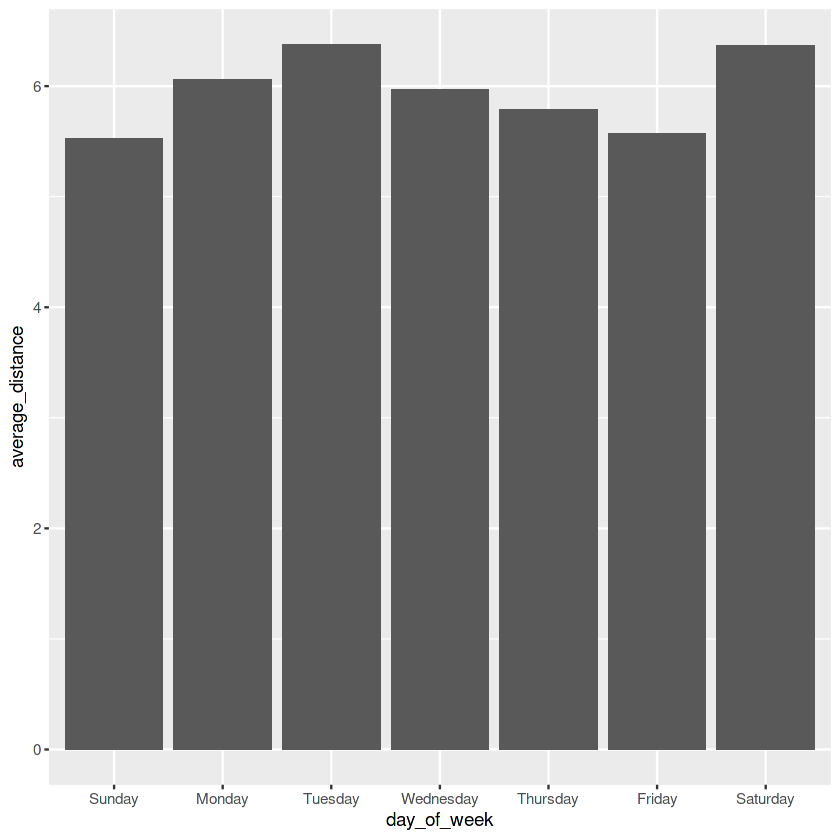

In [36]:
# visualize average TotalDistance by day_of_week

daily_activity %>%
  group_by(day_of_week)%>%
  summarise(average_distance = mean(TotalDistance))%>%
  arrange(day_of_week)%>%
  ggplot(aes(x=day_of_week , y=average_distance))+
  geom_col()

In [37]:
# Calorie data vs day_of_week

aggregate(daily_activity$Calories, by=list(daily_activity$day_of_week), FUN=mean)

Group.1,x
<ord>,<dbl>
Sunday,2310.927
Monday,2385.618
Tuesday,2423.417
Wednesday,2346.616
Thursday,2240.741
Friday,2351.608
Saturday,2407.447


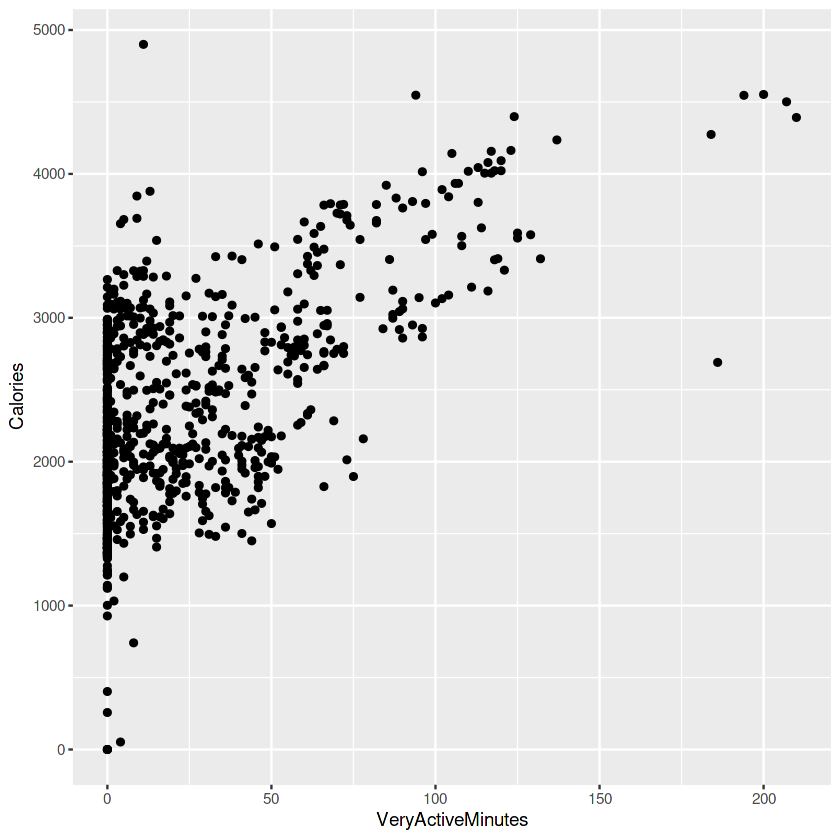

In [38]:
# plot between veryActiveMinutes vs Calories

ggplot(data=daily_activity,mapping = aes(x=VeryActiveMinutes, y=Calories))+
  geom_point()

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



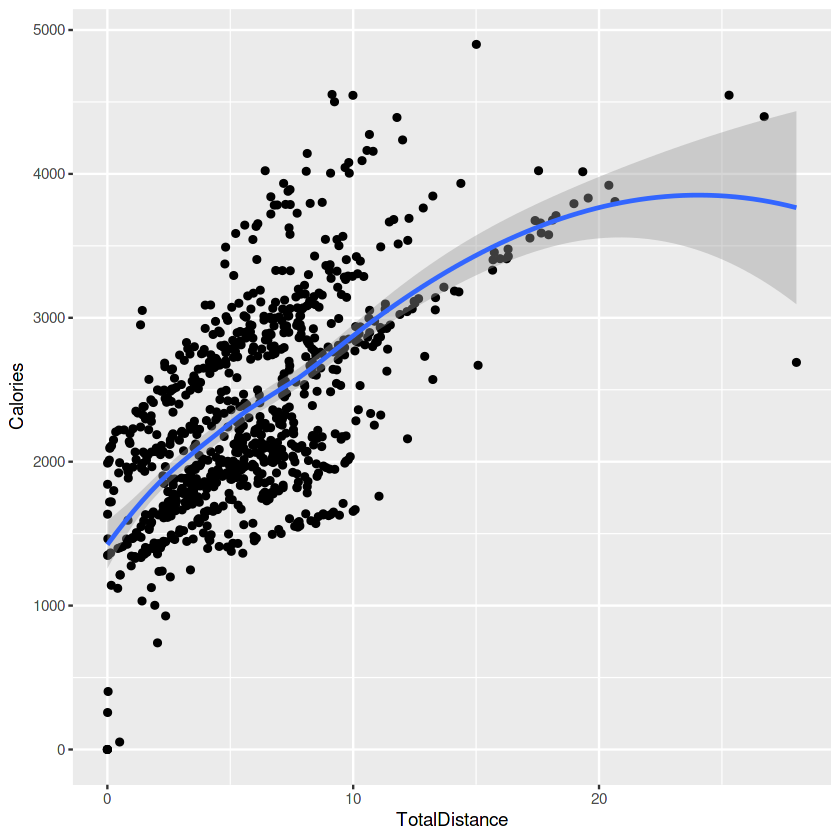

In [39]:
#plot between TotalDistance vs Calories

ggplot(data=daily_activity,mapping = aes(x=TotalDistance, y=Calories))+
  geom_point()+geom_smooth()

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



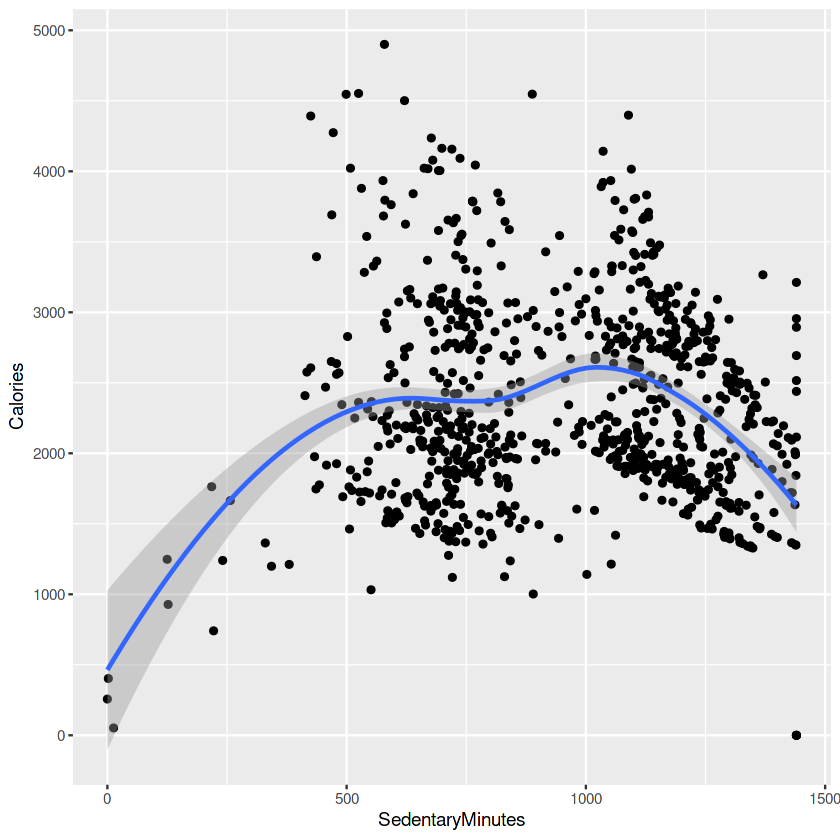

In [40]:
#plot between SedentryMinutes vs Calories

ggplot(data=daily_activity,mapping = aes(x=SedentaryMinutes, y=Calories))+
  geom_point()+geom_smooth()

Group.1,x
<chr>,<dbl>
00,71.80514
01,70.16506
02,69.18650
03,67.53805
04,68.26180
05,81.70815
06,86.99678
07,94.47798
08,103.33727


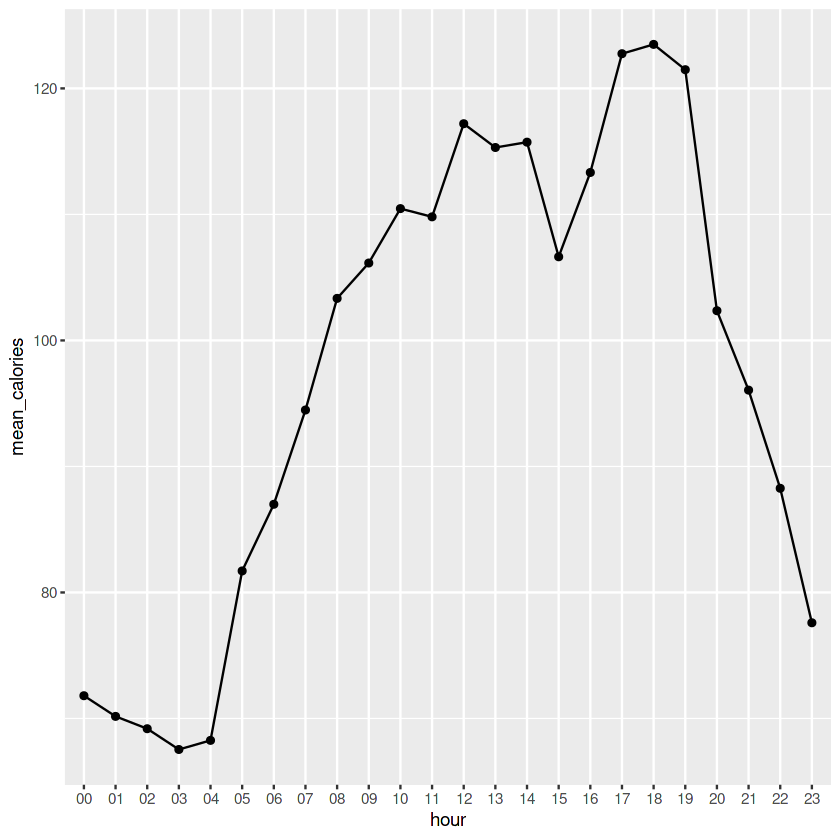

In [41]:
#Analyzing Hourly data

# average calories burnt on hourly basis

aggregate(hourly_activity$Calories, by=list(hourly_activity$hour), FUN=mean)

hourly_activity%>%
  group_by(hour)%>%
  summarise(mean_calories = mean(Calories))%>%
  ggplot(aes(x=hour, y=mean_calories,group=1))+
  geom_line()+geom_point()

Group.1,x
<dbl>,<int>
1503960366,374546
1624580081,177750
1644430081,217927
1844505072,79942
1927972279,28400
2022484408,351712
2026352035,172068
2320127002,146035
2347167796,171337


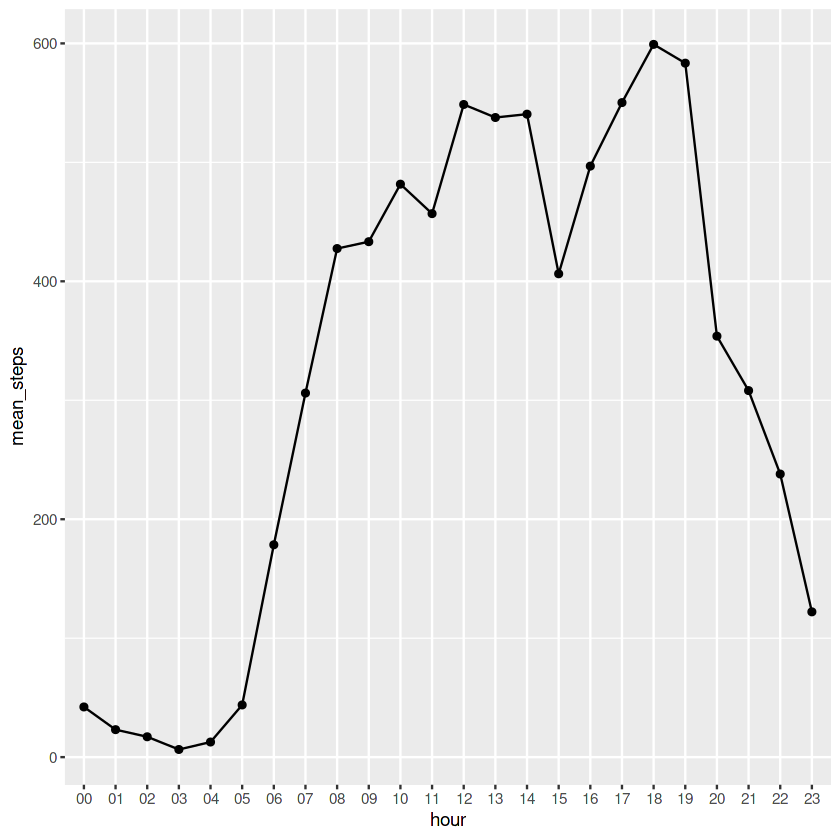

In [42]:
# average steps taken on hourly basis

hourly_activity%>%
  group_by(hour)%>%
  summarise(mean_steps = mean(StepTotal))%>%
  ggplot(aes(x=hour, y=mean_steps,group=1))+
  geom_line()+geom_point()

aggregate(hourly_activity$StepTotal, by=list(hourly_activity$Id), FUN=sum)

## Analysis results:

The data sets are cleaned and ready for analysis. All the datasets are combined to 3 dataframes with daily, hourly and minute wise data of users.
1.	Analyzing daily_activity dataframe:  
    •	Total distance travelled is proportional to total steps taken daily.  
    •	Average total distance is high on Tuesday & Saturday as compared to other week days and lowest on Sunday.  
    •	Total distance is also proportional to Calories burnt in a day.  
    •	For some records the Total distance is greater than zero but Tracker distance records zero.  
    •	As SedentryMinutes increase after value of 1000, Calories data drops. This shows more inactive time results in less calories burn.  
2.	Analyzing hourly_activity dataframe:  
    •	Most amount of calories on an average are burnt between 12 and 19 hour. This maybe because this is prime working hours. Most calories are burnt between 17 to 19 hour which suggests users indulge in physical activities like exercising, sports or gym.  
    •	The data for steps taken in a day is very similar to calories burnt.

# Share

I have used R to plot some visualizations for analysis and finding out trends in the data. For sharing the findings I have made visualizations in Tableau. The visualizations created shows relationship between steps and calories. It also shows the trends on weekly basis. It also includes Dashboard which incorporated all the visualization. Click on below Tableau link to access the visualizations:

https://public.tableau.com/app/profile/divya.jain7194/viz/BellaBeatCaseStudy2/Dashboard1#2

# Act

__Top high-level insights based on your analysis__  
Based on the analysis below are my top recommendations:  
1.	Distance travelled is directly proportional to steps taken. Also average distance travelled shows that in a particular week, Sundays, Thursdays & Fridays mark lowest average. Sunday being considered an off day, a special notification can be pushed on Thursdays and Fridays to increase distance travelled (Steps taken) to improve the average.  
2.	Sedentary minutes comes out to be a major factor in determining calories burnt. Data shows that when sedentary minutes starts to increase beyond 1000 minutes, Calories burnt starts decreasing.   Hence device can suggest users to set the limit on sedentary minutes to avoid increased idle time.
3.	Most amount of average calories burnt are between hours 12:00 and 19:00. Enhanced analysis by devices can be focused between this time range to provide detail information to users.
